# R2: 0.946386123577978

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
df= pd.read_csv('2018-2021년_2_자치구별_따릉이_이용건수.csv')

In [31]:
df.drop(columns='Unnamed: 0', inplace=True)

In [32]:
df['일시']=pd.to_datetime(df['일시'])
df['year'] = df.일시.apply(lambda x : x.year)
df['month'] = df.일시.apply(lambda x : x.month)
df['day'] = df.일시.apply(lambda x : x.day)

In [33]:
df1 = df.drop(columns='일시')


In [34]:
df1.columns

Index(['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
       '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
       '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일',
       '계절', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '일합계', 'year', 'month',
       'day'],
      dtype='object')

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

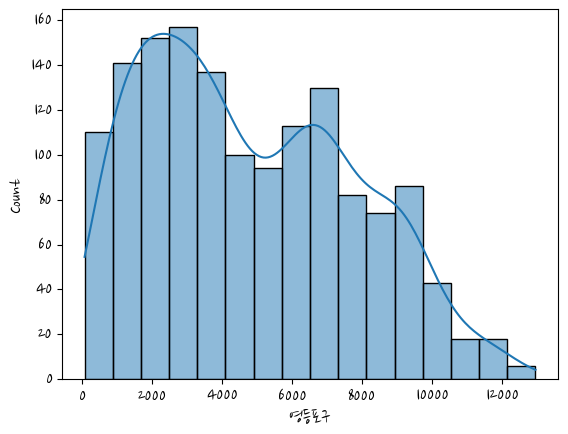

In [35]:
sns.histplot(df['영등포구'], kde=True)

In [36]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, pred)
    # rmse = np.sqrt(mse)
    # print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   평균기온            1461 non-null   float64
 1   최저기온            1461 non-null   float64
 2   최고기온            1461 non-null   float64
 3   일강수량            1461 non-null   float64
 4   최대순간풍속          1461 non-null   float64
 5   최대순간풍속풍향        1461 non-null   int64  
 6   최대풍속            1461 non-null   float64
 7   최대풍속풍향          1461 non-null   int64  
 8   평균풍속            1461 non-null   float64
 9   최다풍향            1461 non-null   int64  
 10  평균이슬점온도         1461 non-null   float64
 11  최소상대습도          1461 non-null   int64  
 12  평균상대습도          1461 non-null   float64
 13  평균증기압           1461 non-null   float64
 14  평균전운량           1461 non-null   float64
 15  평균중하층운량         1461 non-null   float64
 16  일최심적설           1461 non-null   float64
 17  일최심신적설          1461 non-null   f

In [54]:
df1 = df[['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
      '요일', '계절', 'year', 'month',
       'day', '영등포구']] #확인할 컬럼 추출

In [55]:
X = df1.drop(columns=['영등포구'])
y = df1['영등포구']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [57]:
# 전처리전 모델 1차 확인
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

[1307.1529626214515, 1307.1529626214515, 1307.1529626214515]

In [58]:
# 계산처리 안할거 문자로 바꾸기
df1[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day',]]= df1[[ '강수여부','휴일여부','요일', '계절', 'year', 'month','day']].astype('str')

In [59]:
from scipy.stats import skew

# 왜곡도 확인
features_index = df1.dtypes[df1.dtypes != 'object'].index
skew_features= df1[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)

일최심신적설            12.166799
일최심적설              8.847381
일강수량               5.001375
일 미세먼지 농도(㎍/㎥)     3.246978
최대순간풍속             1.400714
dtype: float64

In [60]:
# 왜곡도 1 이상은 로그로 변환
df1[skew_features_top.index]= np.log1p(df1[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

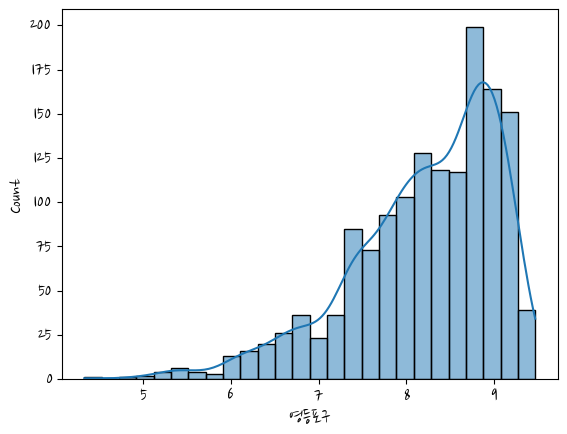

In [61]:
# y값 정규분포로 변환
log_test = np.log1p(df1['영등포구'])
sns.histplot(log_test, kde=True)

In [62]:
# 문자열 치환 원앤핫인코딩
df1 = pd.get_dummies(df1)
X = df1.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [63]:
# 모델 2차 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_rmse(model)

    # y_t= np.expm1(y_test)
    # p_t = np.expm1(pred)
    # for solve, predd in zip(y_t, p_t):
    #     print(f'{solve}, {predd}') 
    # get_mse = mean_squared_error(y_test, pred)
    # rmse = np.sqrt(mse)
    # print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))


MSE: 0.07280745805695467, RMSE: 0.2698285716097439, R2: 0.8950294045936424


In [64]:
np.expm1(0.2698285716097439)

0.30973990488348213

In [65]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

3612.9999999999977, 3711.7609093901465
7810.000000000003, 9425.79679919781
9410.999999999993, 7986.496480061052
4173.999999999999, 3773.6628309899957
1100.9999999999995, 768.0781756169612
596.0000000000001, 1238.6263337924988
2553.0000000000005, 1588.591005334685
8704.0, 8917.43693279598
5704.000000000002, 6793.023831648377
2302.0000000000005, 2831.181975343237
5091.000000000003, 2384.788839687192
6224.0, 5287.4631197633125
7955.999999999996, 7490.733705638539
761.9999999999999, 1087.8729660528968
9192.000000000002, 11708.390661804144
4667.0, 3930.4240852184835
11707.00000000001, 10112.498359035515
8565.999999999996, 11256.946647082765
9699.000000000004, 7812.011776220526
2573.000000000001, 2162.532797061165
7300.999999999994, 5731.569966957505
9872.000000000004, 15327.367416393987
6212.000000000005, 5946.698748765513
8302.999999999995, 10446.046370985954
7578.000000000002, 6769.325156433893
6156.999999999998, 4820.694673700492
5918.9999999999945, 6298.5850200372615
7197.000000000004, 

# 회귀 계수

In [49]:
def get_top_botton_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X.columns) #회귀계수값 시리즈로 만들기
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low
get_top_botton_coef(lr_reg)

(year_2021    0.464172
 year_2020    0.272818
 month_12     0.262548
 계절_3         0.112047
 강수여부_1.0     0.080993
 month_11     0.076709
 휴일여부_0       0.069336
 일최심신적설       0.067497
 month_10     0.063570
 요일_2         0.058731
 dtype: float64,
 일강수량        -0.087648
 계절_4        -0.089620
 요일_5        -0.091814
 요일_6        -0.094558
 day_16      -0.107890
 year_2019   -0.124661
 month_2     -0.137553
 일최심적설       -0.202413
 month_1     -0.214615
 year_2018   -0.612328
 dtype: float64)

In [52]:
pd.set_option('display.max_seq_items', None)

In [53]:
print(df1.columns)

Index(['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속', '최대풍속풍향',
       '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압', '평균전운량',
       '평균중하층운량', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', '강남구', '강동구', '강북구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구',
       '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구',
       '중구', '중랑구', '일합계', '강수여부_0.0', '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0',
       '요일_1', '요일_2', '요일_3', '요일_4', '요일_5', '요일_6', '계절_1', '계절_2', '계절_3',
       '계절_4', 'year_2018', 'year_2019', 'year_2020', 'year_2021', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_1',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
   